# Capstone Project

## Deceptive Review Classification

In this project, I am utilizing machine learning, and semi-supervised learning on a deceptive spam classification project on Tripadvisor reviews. Labeled dataset is from dataset from Myle Ott's reserch paper. 1600 unlabeled data was web scraped from tripadvisor for the same hotels for semi-supervised learning models. The goal is to predict the probability of hotel reivews wheather if it is decpetive or not by binary target isFraud. Machine learning model on labeled data to see the result will be developed first. Unlabeled data will be test with pre-trained models and semi-supervised learning model will be developed last.

In [1]:
# Importing tools for the job
import matplotlib
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import cross_val_score
import os, glob, pandas as pd, numpy as np, seaborn as sns, snowballstemmer, re
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import  Counter
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from string import ascii_lowercase
from nltk.stem import WordNetLemmatizer 
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
from nltk.corpus import wordnet
from gensim.models import Doc2Vec
from gensim.models import doc2vec
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import keras
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing import sequence, text
from tqdm import tqdm
from sklearn import preprocessing, model_selection, pipeline
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import sparse
from sklearn.naive_bayes import MultinomialNB
from keras.layers.embeddings import Embedding
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.recurrent import LSTM, GRU
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import lightgbm as lgb
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE
from xgboost.sklearn import XGBClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import pomegranate as pg


In [2]:
# No need to see warning signs
import warnings
warnings.simplefilter('ignore')

# Data Mining

In [3]:
# Loading negative isFraud reviews
# Opens all the text files in the path folder

file_path = r"C:\Users\Jun\Data_Sci\Capstone\DataFiles\negative_polarity\deceptive_from_MTurk"
read_files = glob.glob(os.path.join(file_path, "*.txt"))

negativeisFraud = []
for files in read_files:
    df = pd.read_csv(files, header= None, delimiter="\t",encoding='utf-8')
    negativeisFraud.append(df)
    

In [4]:
# Putting them in to Pandas Dataframe

merge_values = np.vstack(negativeisFraud)
negative = pd.DataFrame(merge_values)
negative.columns = ['reviews']               # Adding column for classification
negative['isFraud'] = 1                      # Adding classification
negative.head(3)

reviews  isFraud
0  Affinia Chicago is one of the worst hotels I h...        1
1  I recently stayed at the Affina Chicago hotel ...        1
2  I stayed at the Affina Chicago for my annivers...        1

In [5]:
# Loading negative notFraud reviews

file_path = r"C:\Users\Jun\Data_Sci\Capstone\DataFiles\negative_polarity\truthful_from_Web"
read_files = glob.glob(os.path.join(file_path, "*.txt"))

negative_notFraud = []
for files in read_files:
    df = pd.read_csv(files, header= None, delimiter="\t",encoding='utf-8')
    negative_notFraud.append(df)
    

In [6]:
# Into Pandas Dataframe

merge_values = np.vstack(negative_notFraud)
negativeNotFraud = pd.DataFrame(merge_values)
negativeNotFraud.columns = ['reviews']          # Adding column
negativeNotFraud['isFraud'] = 0                # Adding classification
negativeNotFraud.head(3)

reviews  isFraud
0  We stayed 2 nights over spring break in what w...        0
1  Stayed at the Fitzpatrick as a result of all o...        0
2  We booked this hotel as a last minute vacation...        0

In [7]:
# Merging negative comments into one dataframe

frames = [negative, negativeNotFraud]
negative = pd.concat(frames)
negative = negative.reset_index(drop=True)
negative['negative'] = 1                      # Adding sentiment
negative.head(3)

reviews  isFraud  negative
0  Affinia Chicago is one of the worst hotels I h...        1         1
1  I recently stayed at the Affina Chicago hotel ...        1         1
2  I stayed at the Affina Chicago for my annivers...        1         1

In [8]:
# Loading positive isFraud reviews

file_path = r"C:\Users\Jun\Data_Sci\Capstone\DataFiles\positive_polarity\deceptive_from_MTurk"
read_files = glob.glob(os.path.join(file_path, "*.txt"))

positiveisFraud = []
for files in read_files:
    df = pd.read_csv(files, header= None, delimiter="\t",encoding='utf-8')
    positiveisFraud.append(df)

In [9]:
# Into pandas dataframe

merge_values = np.vstack(positiveisFraud)
positive = pd.DataFrame(merge_values)
positive.columns = ['reviews']
positive['isFraud'] = 1                    # Adding classification
positive.head(3)

reviews  isFraud
0  After recent week stay at the Affinia Hotels, ...        1
1  Although much too overpriced in my opinion, th...        1
2  The Affinia hotel in Chicago was superb. the r...        1

In [10]:
# Loading positive notisFraud reviews

file_path = r"C:\Users\Jun\Data_Sci\Capstone\DataFiles\positive_polarity\truthful_from_TripAdvisor"
read_files = glob.glob(os.path.join(file_path, "*.txt"))

positiveNotFraud = []
for files in read_files:
    df = pd.read_csv(files, header= None, delimiter="\t",encoding='utf-8')
    positiveNotFraud.append(df)

In [11]:
# Into pandas dataframe

merge_values = np.vstack(positiveNotFraud)
positive1 = pd.DataFrame(merge_values)
positive1.columns = ['reviews']
positive1['isFraud'] = 0                    # Adding classification
positive1.head(3)

reviews  isFraud
0  I was completely blown away by this hotel. It ...        0
1  We've just returned from a two night stay at t...        0
2  Excellent location, feels like a boutique hote...        0

In [12]:
# Adding positive reviews dataframes together

frames = [positive1, positive]
positive = pd.concat(frames)
positive = positive.reset_index(drop=True)
positive['negative'] = 0                  # Adding classification for sentiment
positive.head(3)

reviews  isFraud  negative
0  I was completely blown away by this hotel. It ...        0         0
1  We've just returned from a two night stay at t...        0         0
2  Excellent location, feels like a boutique hote...        0         0

In [13]:
# Adding positive/negative reveiws dataframes together

frames = [positive, negative]
df = pd.concat(frames)
df = df.reset_index(drop=True)
df.head(5)

reviews  isFraud  negative
0  I was completely blown away by this hotel. It ...        0         0
1  We've just returned from a two night stay at t...        0         0
2  Excellent location, feels like a boutique hote...        0         0
3  I travel a lot for business and quite frankly,...        0         0
4  We visited for my 40th birthday. We had never ...        0         0

In [14]:
df_unlabel = pd.read_csv('unlabeled_reviews.csv', index_col=0)

In [15]:
df_unlabel

reviews
0     We had a great stay! The location was convenie...
1     My parents came to this hotel in August becaus...
2     The staff was amazing and offered such great a...
3     We stayed at the kinzie this past weekend and ...
4     The staff was very welcoming from walking thro...
...                                                 ...
1595  Very Hotel. Not thrilled with the remodeling o...
1596  I used to live in Chicago, so love that when I...
1597  We stayed for a few days over the Holidays.  I...
1598  The Talbott Hotel is the place to stay while v...
1599  My partner and I were looking forward to visit...

[1600 rows x 1 columns]

# Exploratory Analysis

In [16]:
# Cehcking overall for NaNs and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   1600 non-null   object
 1   isFraud   1600 non-null   int64 
 2   negative  1600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 37.6+ KB


In [17]:
# Cehcking overall for NaNs and data type

df_unlabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1600 non-null   object
dtypes: object(1)
memory usage: 25.0+ KB


<AxesSubplot:xlabel='isFraud', ylabel='count'>

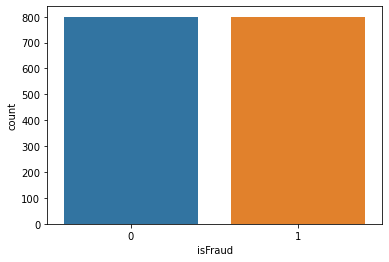

In [18]:
# Graph for clariffication

sns.countplot(x= 'isFraud', data= df)

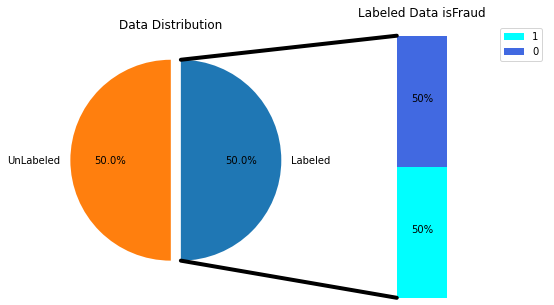

In [19]:
from matplotlib.patches import ConnectionPatch

fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.5, .5]
labels = ['Labeled', 'UnLabeled']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.5, .5]
width = .2
colors = [['cyan'], ['royalblue']]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Labeled Data isFraud')
ax2.legend(('1', '0'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)

con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
ax1.set(title='Data Distribution')
plt.show()

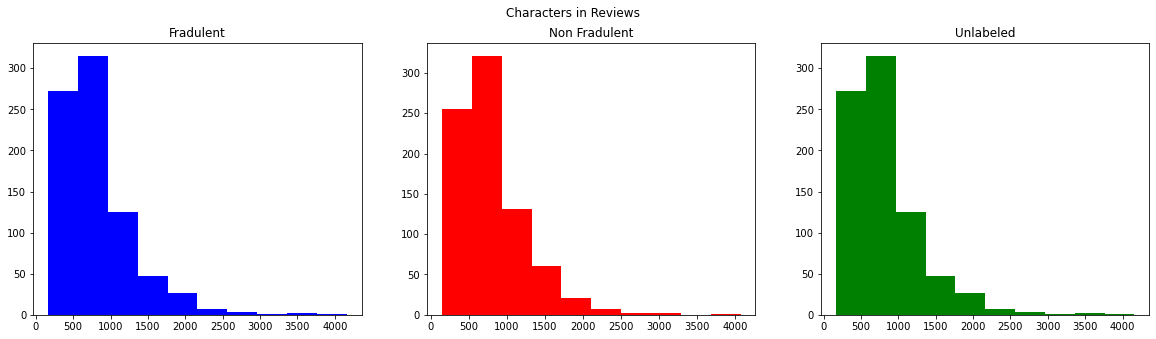

In [20]:
# Number of characters comparison graph for fradulent/non-fradulent comments 

fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,5))
df_len=df[df['isFraud']==0]['reviews'].str.len()
ax1.hist(df_len,color='blue')
ax1.set_title('Fradulent')

df_len1=df[df['isFraud']==1]['reviews'].str.len()
ax2.hist(df_len1,color='red')
ax2.set_title('Non Fradulent')
fig.suptitle('Characters in Reviews')

df_len3= df_unlabel['reviews'].str.len()
ax3.hist(df_len,color='green')
ax3.set_title('Unlabeled')

plt.show()

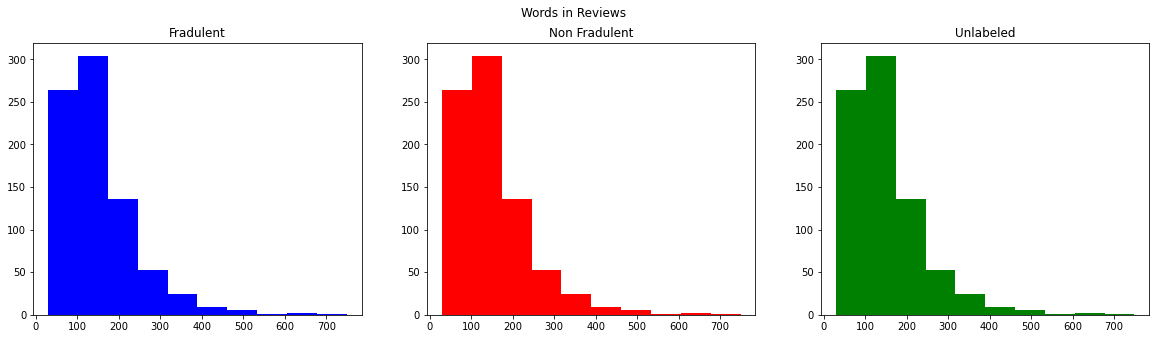

In [21]:
# Number of words comparison graph for fradulent/non-fradulent comments 

fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,5))
df_len=df[df['isFraud']==0]['reviews'].str.split().map(lambda x: len(x))
ax1.hist(df_len,color='blue')
ax1.set_title('Fradulent')

df_len1=df[df['isFraud']==1]['reviews'].str.split().map(lambda x: len(x))
ax2.hist(df_len,color='red')
ax2.set_title('Non Fradulent')
fig.suptitle('Words in Reviews')

df_len3= df_unlabel['reviews'].str.split().map(lambda x: len(x))
ax3.hist(df_len,color='green')
ax3.set_title('Unlabeled')


plt.show()

Text(0.5, 0.98, 'Average word length in each review')

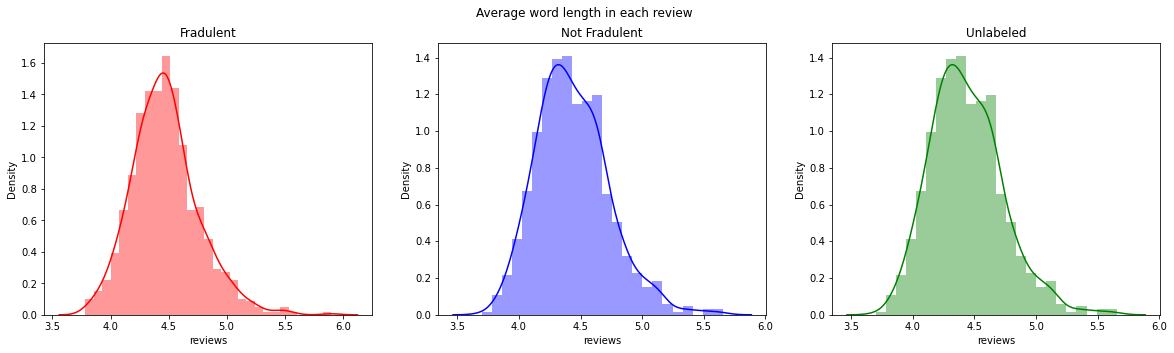

In [22]:
# Graph comparison for average word length

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
word=df[df['isFraud']==0]['reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')

ax1.set_title('Fradulent')
word=df[df['isFraud']==1]['reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Not Fradulent')

df_len3= df_unlabel['reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='green')
ax3.set_title('Unlabeled')

fig.suptitle('Average word length in each review')

In [23]:
# Creating corpus for isFraud as target

def create_corpus(isFraud):
    corpus=[]
    
    for x in df[df['isFraud']==isFraud]['reviews'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [24]:
unlabel_corpus = []
labeled_corpus = []

for x in df_unlabel.reviews.str.split():
    for i in x:
        unlabel_corpus.append(i)

for x in df.reviews.str.split():
    for i in x:
        labeled_corpus.append(i)

In [25]:
# setting up corpus stopword language

stop=set(stopwords.words('english'))

Text(0.5, 1.0, 'Not isFraud Stopwords Counts')

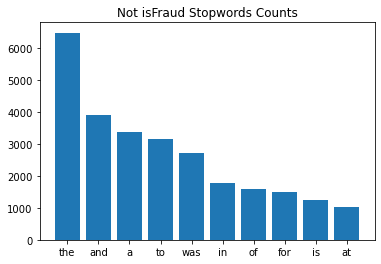

In [26]:
# Plotting counts of stopwords for isFraud = 0

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title('Not isFraud Stopwords Counts')

Text(0.5, 1.0, 'isFraud Stopwords Counts')

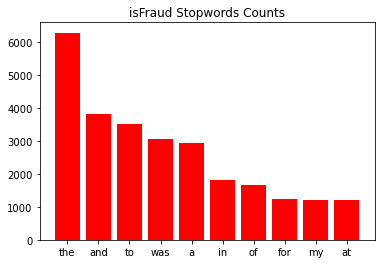

In [27]:
# Plotting counts of stopwords for isFraud = 1

corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top)
plt.bar(x,y, color='red')
plt.title('isFraud Stopwords Counts')

Text(0.5, 1.0, 'Unlabeled Stopwords Counts')

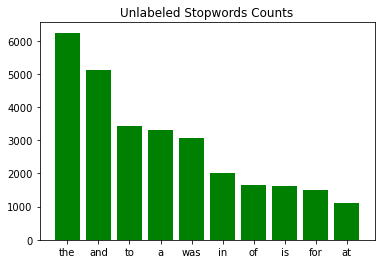

In [28]:
# Plotting counts of stopwords for unlabled

dic=defaultdict(int)

for word in unlabel_corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top)
plt.bar(x,y, color='green')
plt.title('Unlabeled Stopwords Counts')

Text(0.5, 1.0, 'Not isFraud Punctuation Counts')

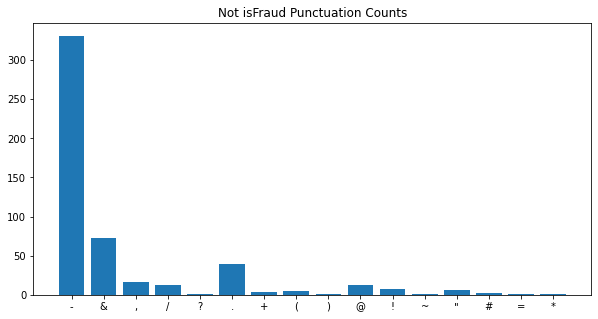

In [29]:
# Plotting punctuations for isFraud =1

plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)
plt.title('Not isFraud Punctuation Counts')

Text(0.5, 1.0, 'isFraud Punctuation Counts')

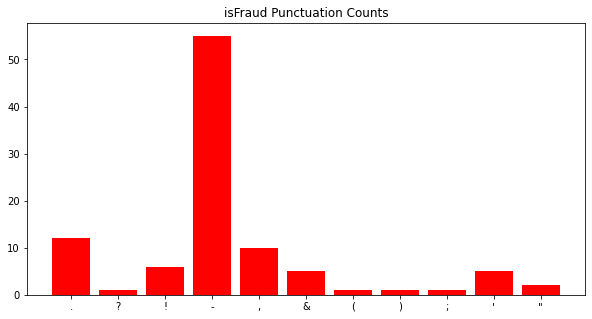

In [30]:
# Plotting punctuations for isFraud =0

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='red')
plt.title('isFraud Punctuation Counts')

Text(0.5, 1.0, 'Unlabeled Punctuation Counts')

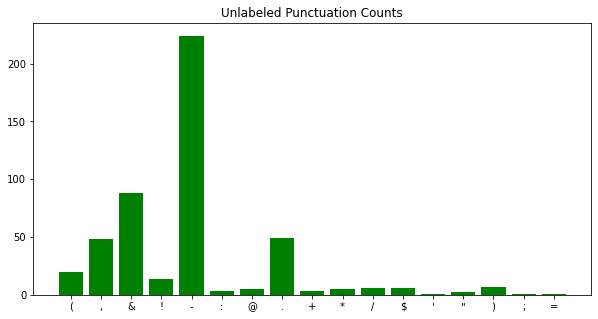

In [31]:
# Plotting punctuations for unlabeled

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)

special = string.punctuation
for i in unlabel_corpus:
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y, color='green')
plt.title('Unlabeled Punctuation Counts')

Text(0.5, 1.0, 'Common words Labeled df')

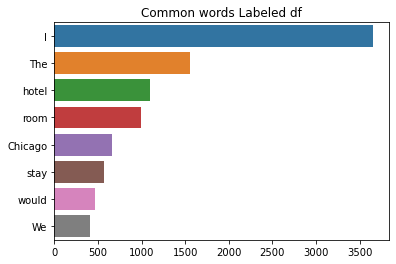

In [32]:
# Plot for the common words in general

counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x).set_title('Common words Labeled df')

Text(0.5, 1.0, 'Common words Unlabeled df')

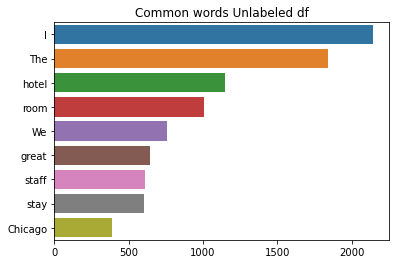

In [33]:
# Plot for the common words in general

counter=Counter(unlabel_corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x).set_title('Common words Unlabeled df')

#### Ngram analysis

In [34]:
# Function to fetch bigram 

def get_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Bigram Labeled df')

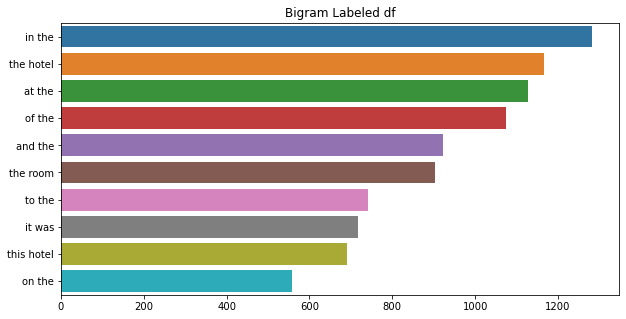

In [35]:
# Plotting bigram frequency graph

plt.figure(figsize=(10,5))
top_review_bigrams=get_bigrams(df['reviews'])[:10]
x,y=map(list,zip(*top_review_bigrams))
sns.barplot(x=y,y=x).set_title('Bigram Labeled df')

Text(0.5, 1.0, 'Bigram Unlabeled df')

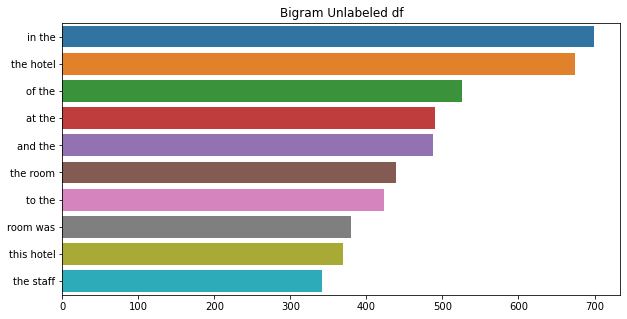

In [36]:
plt.figure(figsize=(10,5))
top_review_bigrams=get_bigrams(df_unlabel['reviews'])[:10]
x,y=map(list,zip(*top_review_bigrams))
sns.barplot(x=y,y=x).set_title('Bigram Unlabeled df')

# Data Cleaning

In [37]:
# Function to clean words
# \n mathces new lines
# \W matches nonword character, \w matches single word character
# \S matches non-whitespace, \s oppposite
# \D matches non-digit, \d opposite
# <.*?>+ matches non-greedy smallest numbers, <.*> matches greedy


def text_cleaning(text):
 
    text = re.sub('\[.*?\]', '', text)            
    text = text.lower() # lowers capitalized letters
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove links
    text = re.sub('<.*?>+', '', text) # Repitition match
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text) # removes new lines
    text = re.sub('\w*\d\w*', '', text) #remove words containing numbers
    
    
    return text

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


In [38]:
# Applying text cleaning to labeled data
df['reviews'] = df.reviews.apply(text_cleaning)
df['reviews'] = df.reviews.apply(deEmojify)

In [39]:
# Applying text cleaning to unlabeled data
df_unlabel['reviews'] = df_unlabel.reviews.apply(text_cleaning)
df_unlabel['reviews'] = df_unlabel.reviews.apply(deEmojify)

In [40]:
# Checking 
df.head(5)

reviews  isFraud  negative
0  i was completely blown away by this hotel  it ...        0         0
1  we ve just returned from a two night stay at t...        0         0
2  excellent location  feels like a boutique hote...        0         0
3  i travel a lot for business and quite frankly ...        0         0
4  we visited for my  birthday  we had never been...        0         0

In [41]:
# Checking 2
df_unlabel.head(5)

reviews
0  we had a great stay  the location was convenie...
1  my parents came to this hotel in august becaus...
2  the staff was amazing and offered such great a...
3  we stayed at the kinzie this past weekend and ...
4  the staff was very welcoming from walking thro...

In [42]:
# Lemmatize sentences
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [43]:
# Applying Lemmatizing for labeled
df['reviews'] = df['reviews'].apply(lambda x: lemmatize_sentence(x))
df.head(5)

reviews  isFraud  negative
0  i be completely blow away by this hotel it be ...        0         0
1  we ve just return from a two night stay at the...        0         0
2  excellent location feel like a boutique hotel ...        0         0
3  i travel a lot for business and quite frankly ...        0         0
4  we visit for my birthday we have never be to c...        0         0

In [44]:
# Applying Lemmatizing for unlabeled
df_unlabel['reviews'] = df_unlabel['reviews'].apply(lambda x: lemmatize_sentence(x))
df_unlabel.head(5)

reviews
0  we have a great stay the location be convenien...
1  my parent come to this hotel in august because...
2  the staff be amazing and offer such great advi...
3  we stay at the kinzie this past weekend and we...
4  the staff be very welcome from walk through th...

In [45]:
# Removing stop words for labeled ones

stop = stopwords.words('english')
df.reviews = df.reviews.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df.head(5)

reviews  isFraud  negative
0  completely blow away hotel magnificent get gre...        0         0
1  return two night stay affinia chicago visit de...        0         0
2  excellent location feel like boutique hotel ri...        0         0
3  travel lot business quite frankly expectation ...        0         0
4  visit birthday never chicago sure stay found d...        0         0

In [46]:
# Removing stop words for unlabeled ones

df_unlabel['reviews'] = df_unlabel['reviews'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_unlabel.head(5)

reviews
0  great stay location convenient everything find...
1  parent come hotel august family reunion home s...
2  staff amazing offer great advice tour food opt...
3  stay kinzie past weekend greet arturo garza on...
4  staff welcome walk door suite omg picture noth...

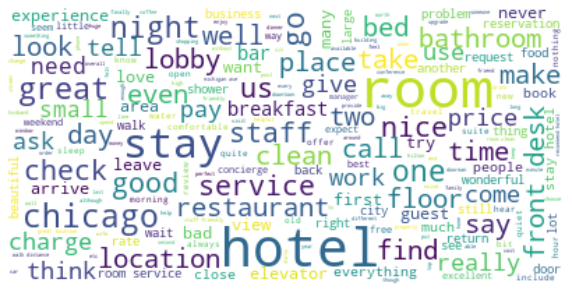

In [47]:
# Word cloud for isFraud=0 after cleaning

df_Notfr = df.loc[df['isFraud'] == 0].reviews.values
Notfr = ' '.join(df_Notfr).replace("\n"," ")


wc = WordCloud(max_font_size=40, background_color='white').generate(Notfr)

plt.figure(figsize=(10,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

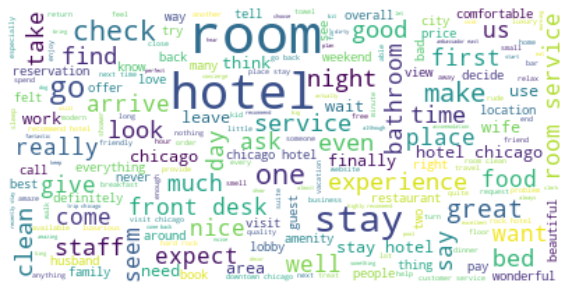

In [48]:
# Word cloud for isFraud=1 after cleaning

df_Notfr = df.loc[df['isFraud'] == 1].reviews.values
Notfr = ' '.join(df_Notfr).replace("\n"," ")


wc = WordCloud(max_font_size=40, background_color='white').generate(Notfr)

plt.figure(figsize=(10,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

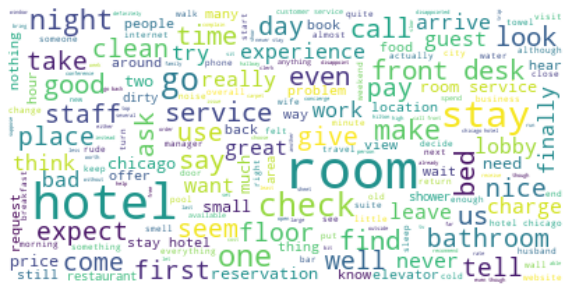

In [49]:
# Word cloud for negative comments

wc = WordCloud()

df_fr = df.loc[df['negative'] == 1].reviews.values
fr = ' '.join(df_fr).replace("\n"," ")


wc = WordCloud(max_font_size=40, background_color='white').generate(fr)

plt.figure(figsize=(10,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

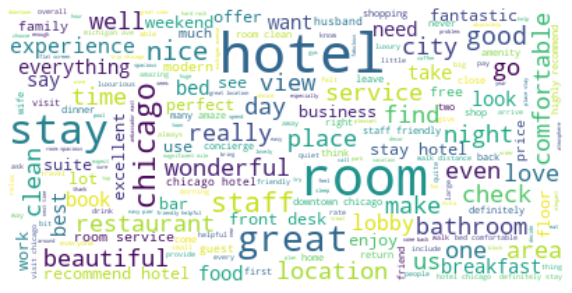

In [50]:
# Word cloud for positive comments


wc = WordCloud()

df_fr = df.loc[df['negative'] == 0].reviews.values
fr = ' '.join(df_fr).replace("\n"," ")


wc = WordCloud(max_font_size=40, background_color='white').generate(fr)

plt.figure(figsize=(10,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

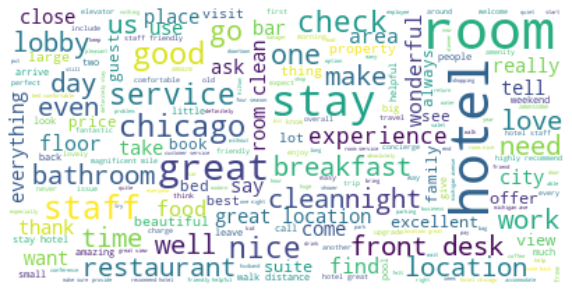

In [51]:
# Word cloud for positive comments


wc = WordCloud()

unlabel = df_unlabel['reviews']
fr = ' '.join(unlabel).replace("\n"," ")


wc = WordCloud(max_font_size=40, background_color='white').generate(fr)

plt.figure(figsize=(10,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
unlabeled_corpus = []
labeled_corpus = []

for x in df_unlabel.reviews.str.split():
    for i in x:
        unlabeled_corpus.append(i)

for x in df.reviews.str.split():
    for i in x:
        labeled_corpus.append(i)

Text(0.5, 1.0, 'Common words Labeled df after text cleaning')

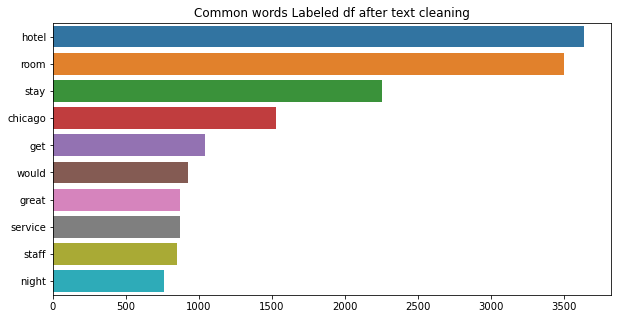

In [53]:
# Plot for the common words for labeled data after text cleaning

counter=Counter(labeled_corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x).set_title('Common words Labeled df after text cleaning')

Text(0.5, 1.0, 'Common words Labeled df after text cleaning')

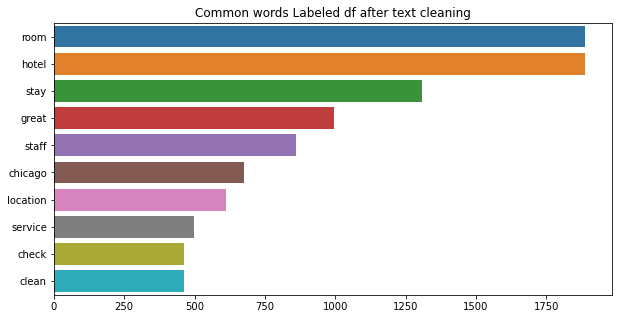

In [54]:
# Plot for the common words for unlabeled data after textcleaning

counter=Counter(unlabeled_corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x).set_title('Common words Labeled df after text cleaning')

Text(0.5, 1.0, 'Bigram Labeled df afer text cleaning')

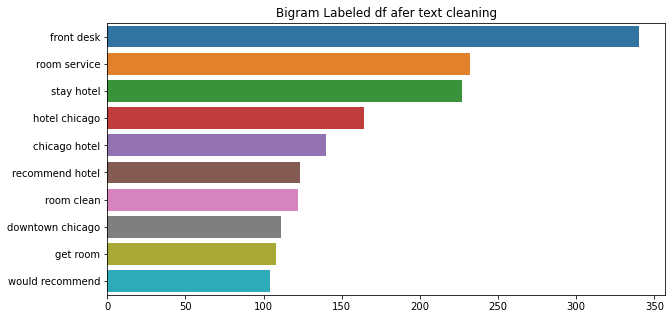

In [55]:
# Plotting bigram frequency graph after text cleaning

plt.figure(figsize=(10,5))
top_review_bigrams=get_bigrams(df['reviews'])[:10]
x,y=map(list,zip(*top_review_bigrams))
sns.barplot(x=y,y=x).set_title('Bigram Labeled df afer text cleaning')

Text(0.5, 1.0, 'Bigram Unlabeled df afer text cleaning')

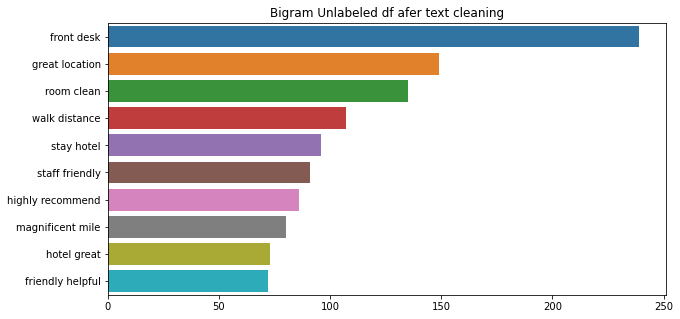

In [56]:
# Plotting bigram frequency graph after text cleaning

plt.figure(figsize=(10,5))
top_review_bigrams=get_bigrams(df_unlabel['reviews'])[:10]
x,y=map(list,zip(*top_review_bigrams))
sns.barplot(x=y,y=x).set_title('Bigram Unlabeled df afer text cleaning')

## Predictive Modeling

### Logistics Regression Model

Popular method of various classification problems, Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

- The dependent variable in logistic regression follows Bernoulli Distribution.
- Estimation is done through maximum likelihood.
- No R Square, Model fitness is calculated through Concordance, KS-Statistics.


#### Counter Vectorizer

- Convert a collection of text documents to a matrix of token counts


#### TF-IDF
- stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.
- The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

In [57]:
# Setting up targets
x= df.reviews
y= df.isFraud
x_unlabel = df_unlabel.reviews

In [58]:
cv=CountVectorizer(ngram_range=(1,2))

x = cv.fit_transform(df.reviews)
x_unlabel = cv.transform(df_unlabel.reviews)



vect_word = TfidfVectorizer(analyzer='word',stop_words= 'english',ngram_range=(1,2),dtype=np.float32)
X =  vect_word.fit_transform(df.reviews)
X_unlabel = vect_word.fit_transform(df_unlabel.reviews)


In [59]:
# Split test and train for 8:2 ratio

x_train_cvec,x_test_cvec,y_train_cvec,y_test_cvec=train_test_split(x,y,random_state=0,test_size=0.2)

x_train_tfidf, x_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(X,y,random_state=0,test_size=0.2)

x_train_un, x_test_un = train_test_split(x_unlabel, random_state=0,test_size=0.2)

#### Count Vectorizer LogisticRegression model

In [60]:
print(x_train_cvec.shape)
print(x_test_cvec.shape)
print(y_train_cvec.shape)
print(y_test_cvec.shape)

print(x_train_un.shape)
print(x_test_un.shape)


print(x_train_tfidf.shape)
print(x_test_tfidf.shape)
print(y_train_tfidf.shape)
print(y_test_tfidf.shape)
print(y_train_tfidf.shape)

(1280, 79264)
(320, 79264)
(1280,)
(320,)
(1280, 79264)
(320, 79264)
(1280, 70260)
(320, 70260)
(1280,)
(320,)
(1280,)


In [61]:
# PCA Plot Function

def plot_PCA(train, test, savepath="PCA_demo.csv", plot=True):
        pca = TruncatedSVD(n_components=2)
        pca.fit(train)
        pca_scores = pca.transform(train)
        color_mapper = {label:idx for idx,label in enumerate(set(test))}
        color_column = [color_mapper[label] for label in test]
        colors = ['orange','blue']
        if plot:
            plt.scatter(pca_scores[:,0], pca_scores[:,1], s=8, alpha=.8, c=test, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='isFraud')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 15})


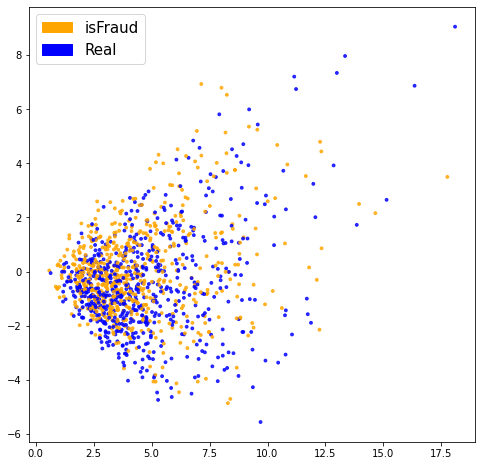

In [62]:
# Plotting for CountVectorized train values

fig = plt.figure(figsize=(8, 8))          
plot_PCA(x_train_cvec, y_train_cvec)
plt.show()

In [63]:
# Fitting model using LogisticRegression

lr=LogisticRegression(max_iter=20000)
lr.fit(x_train_cvec,y_train_cvec)
pred_LR_cv=lr.predict(x_test_cvec)
LogisticsRegression_cv =accuracy_score(y_test_cvec,pred_LR_cv)
print("Accuracy: %.2f%%" % (LogisticsRegression_cv*100.0))

Accuracy: 85.62%


In [64]:
# Confusion matrix

print(confusion_matrix(y_test_cvec, pred_LR_cv))

[[134  28]
 [ 18 140]]


In [65]:
# Classification Report

print(classification_report(y_test_cvec, pred_LR_cv))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       162
           1       0.83      0.89      0.86       158

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



<AxesSubplot:>

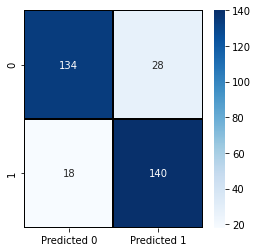

In [66]:
# Pretty version of confusion matrix

cm = confusion_matrix(y_test_cvec,pred_LR_cv)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

In [67]:
# 5 fold validation model to just make sure



skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, x, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 85.81%


#### TF-IDF LogisticRegression model

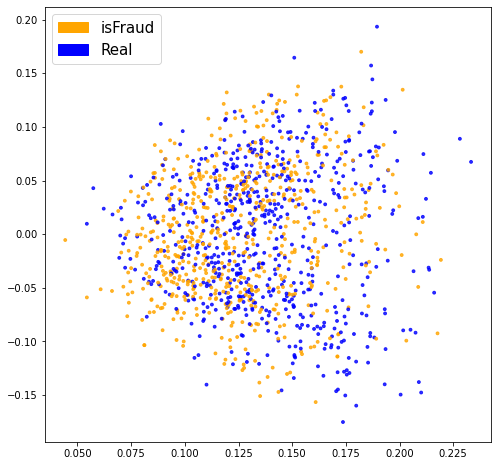

In [68]:
# PCA plot for TF-IDF vectorizer
fig = plt.figure(figsize=(8, 8))          
plot_PCA(x_train_tfidf, y_train_tfidf)
plt.show()

In [69]:
# Building TF-IDF LogisticRegression model

lr=LogisticRegression(max_iter=20000)
lr.fit(x_train_tfidf,y_train_tfidf)
pred_LR_tfidf=lr.predict(x_test_tfidf)

In [70]:
# Accuracy

LogisticsRegression_tfidf =accuracy_score(y_test_tfidf,pred_LR_tfidf)
print("Accuracy: %.2f%%" % (LogisticsRegression_tfidf*100.0))

Accuracy: 85.00%


In [71]:
# Basic confusion matrix

print(confusion_matrix(y_test_tfidf, pred_LR_tfidf))

[[137  25]
 [ 23 135]]


In [72]:
# Classification report

print(classification_report(y_test_tfidf, pred_LR_tfidf))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       162
           1       0.84      0.85      0.85       158

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



<AxesSubplot:>

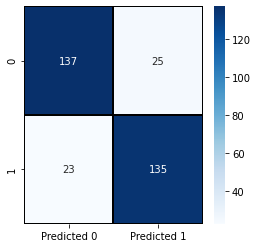

In [73]:
# Pretty version of confusion matrix of TFIDF LR model

cm = confusion_matrix(y_test_tfidf,pred_LR_tfidf)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

In [74]:
# Cross validation for 5 fold for TFIDF


skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 86.38%


### Support Vector Machine Model

#### SVM CV

In [75]:
# Fitting it right away, linear model with Countvectorizor

svm=SVC(kernel = 'linear')
svm.fit(x_train_cvec,y_train_cvec)
SCV_pred_CV=svm.predict(x_test_cvec)
SCV_pred_CV_score = accuracy_score(y_test_cvec,SCV_pred_CV)
print("Accuracy: %.2f%%" % (SCV_pred_CV_score*100.0))

Accuracy: 85.94%


In [76]:
# Confusion matrix

print(confusion_matrix(y_test_cvec, SCV_pred_CV))

[[139  23]
 [ 22 136]]


In [77]:
# Classification reports

print(classification_report(y_test_cvec, SCV_pred_CV))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       162
           1       0.86      0.86      0.86       158

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



<AxesSubplot:>

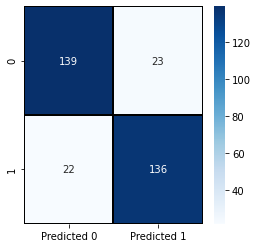

In [78]:
# Pretty confusion matrix

cm = confusion_matrix(y_test_cvec,SCV_pred_CV)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

In [79]:
# 5 fold cross validation


skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = SVC(kernel='linear')
results_skfold = model_selection.cross_val_score(model_skfold, x, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 85.25%


#### SVM TF-IDF

In [80]:
# SVM TF-IDF model

svm.fit(x_train_tfidf,y_train_tfidf)
SCV_pred_tfidf=svm.predict(x_test_tfidf)
SCV_pred_tfidf_score = accuracy_score(y_test_tfidf,SCV_pred_tfidf)

print("Accuracy: %.2f%%" % (SCV_pred_tfidf_score*100.0))

Accuracy: 86.56%


In [81]:
# Confusion Matrix

print(confusion_matrix(y_test_tfidf, SCV_pred_tfidf))

[[138  24]
 [ 19 139]]


In [82]:
# Classification report

print(classification_report(y_test_tfidf, SCV_pred_tfidf))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       162
           1       0.85      0.88      0.87       158

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



<AxesSubplot:>

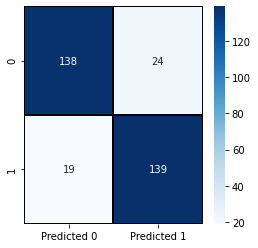

In [83]:
# Pretty Confusion matrix

cm = confusion_matrix(y_test_tfidf,SCV_pred_tfidf)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

In [84]:
# 5 fold cross validation

skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = SVC(kernel ='linear')
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 87.69%


### Multinomial Naive Bayes Classifier 

#### Multinomial Naive Bayse Count Vectorizer Model

In [85]:
# Multinomial Naive Bayse Count Vectorizer Model

nb=MultinomialNB()
nb.fit(x_train_cvec,y_train_cvec)
MNB_pred_CV = nb.predict(x_test_cvec)
MNB_pred_CV_score = accuracy_score(y_test_cvec, MNB_pred_CV)
print("Accuracy: %.2f%%" % (MNB_pred_CV_score*100.0))

Accuracy: 85.94%


In [86]:
# CM

print(confusion_matrix(y_test_cvec, MNB_pred_CV))

[[126  36]
 [  9 149]]


In [87]:
# classification report

print(classification_report(y_test_cvec, MNB_pred_CV))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       162
           1       0.81      0.94      0.87       158

    accuracy                           0.86       320
   macro avg       0.87      0.86      0.86       320
weighted avg       0.87      0.86      0.86       320



<AxesSubplot:>

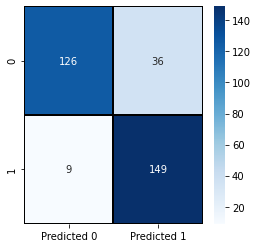

In [88]:
# Pretty CM

cm = confusion_matrix(y_test_cvec, MNB_pred_CV)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

In [89]:
# 5 fold cross validation model


skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = MultinomialNB()
results_skfold = model_selection.cross_val_score(model_skfold, x, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 87.69%


#### Multinomial Naive Base TF-IDF Model

In [90]:
# Fitting the model

nb=MultinomialNB()
nb.fit(x_train_tfidf,y_train_tfidf)
MNB_pred_tfidf = nb.predict(x_test_tfidf)
MNB_pred_tfidf_score = accuracy_score(y_test_tfidf, MNB_pred_tfidf)
print("Accuracy: %.2f%%" % (MNB_pred_tfidf_score*100.0))

Accuracy: 83.44%


In [91]:
# CM

print(confusion_matrix(y_test_tfidf, MNB_pred_tfidf))

[[119  43]
 [ 10 148]]


In [92]:
# Classification report

print(classification_report(y_test_tfidf, MNB_pred_tfidf))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       162
           1       0.77      0.94      0.85       158

    accuracy                           0.83       320
   macro avg       0.85      0.84      0.83       320
weighted avg       0.85      0.83      0.83       320



<AxesSubplot:>

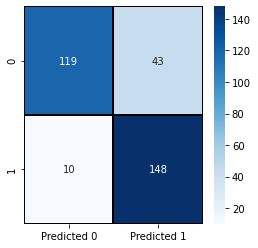

In [93]:
# Pretty CM

cm = confusion_matrix(y_test_tfidf, MNB_pred_tfidf)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

In [94]:
# 5 fold CV

skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = MultinomialNB()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 86.31%


Real quick, comparing with even more classifiers. Countvectorization vs TFIDF Vectorization

In [95]:
# With TF-IDF 

x= df.reviews
y= df.isFraud

vect_word = TfidfVectorizer(analyzer='word',stop_words= 'english',ngram_range=(1,2),dtype=np.float32)
x_train1 = vect_word.fit_transform(x)


models = [
 XGBClassifier(),
 MultinomialNB(),
 SVC(kernel='linear'),
 LogisticRegression(),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier()
]

for model in models:
    model.seed = 42
    num_folds = 5

    scores = cross_val_score(model, x_train1, y, cv=num_folds)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean()*100.0, scores.std() * 2)

    print('{model:25} CV-5 Accuracy: {score}'.format(
     model=model.__class__.__name__,
     score=score_description
     ))


XGBClassifier             CV-5 Accuracy:  81.56 (+/- 0.03)
MultinomialNB             CV-5 Accuracy:  86.31 (+/- 0.05)
SVC                       CV-5 Accuracy:  87.69 (+/- 0.03)
LogisticRegression        CV-5 Accuracy:  86.38 (+/- 0.04)
KNeighborsClassifier      CV-5 Accuracy:  74.38 (+/- 0.06)
RandomForestClassifier    CV-5 Accuracy:  83.25 (+/- 0.06)
GradientBoostingClassifier CV-5 Accuracy:  80.25 (+/- 0.02)


In [96]:
# With Counter Vectorization

x= df.reviews
y= df.isFraud

x_train2 = cv.fit_transform(x)


models = [
 XGBClassifier(),
 MultinomialNB(),
 SVC(kernel='linear'),
 LogisticRegression(),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier()
]

for model in models:
    model.seed = 42
    num_folds = 5

    scores = cross_val_score(model, x_train2, y, cv=num_folds)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean()*100.0, scores.std() * 2)

    print('{model:25} CV-5 Accuracy: {score}'.format(
     model=model.__class__.__name__,
     score=score_description
     ))


XGBClassifier             CV-5 Accuracy:  81.06 (+/- 0.03)
MultinomialNB             CV-5 Accuracy:  87.69 (+/- 0.06)
SVC                       CV-5 Accuracy:  85.25 (+/- 0.02)
LogisticRegression        CV-5 Accuracy:  85.81 (+/- 0.03)
KNeighborsClassifier      CV-5 Accuracy:  52.06 (+/- 0.01)
RandomForestClassifier    CV-5 Accuracy:  83.56 (+/- 0.04)
GradientBoostingClassifier CV-5 Accuracy:  80.81 (+/- 0.03)


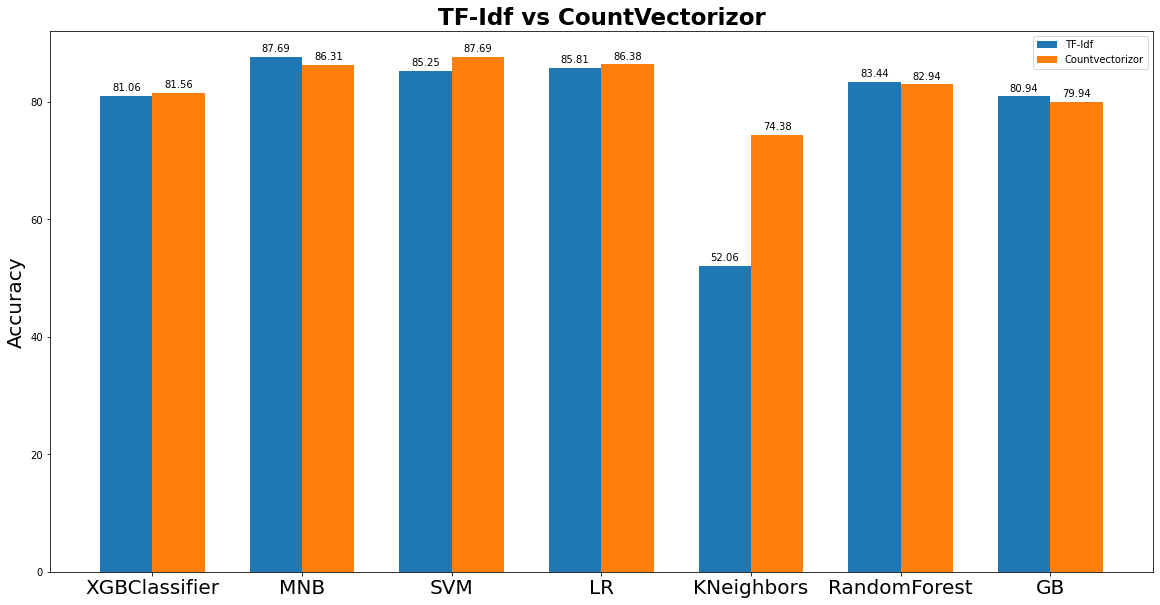

In [97]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['XGBClassifier','MNB', 'SVM',
         'LR', 'KNeighbors', 'RandomForest','GB']
tfidf = [81.06,  
     87.69,
     85.25,
     85.81,
     52.06,
     83.44, 
     80.94]

cv = [81.56,    
     86.31 ,
     87.69,
     86.38,
     74.38,
     82.94,
     79.94]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tfidf, width, label='TF-Idf')
rects2 = ax.bar(x + width/2, cv, width, label='Countvectorizor')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_title('TF-Idf vs CountVectorizor', fontsize=23,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels , fontsize=20)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(18,10)
plt.show()

### Word2Vec Neural Network Model
- Developed by Google, word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. 

In [98]:
# Converting text to format for Genism

words = []
for i in df.reviews.values:
    words.append(i.split())
words[:5]

[['completely',
  'blow',
  'away',
  'hotel',
  'magnificent',
  'get',
  'great',
  'deal',
  'happy',
  'stay',
  'arrive',
  'nervous',
  'read',
  'bad',
  'review',
  'impact',
  'renovation',
  'people',
  'stay',
  'example',
  'noisy',
  'however',
  'whilst',
  'renovation',
  'still',
  'go',
  'gym',
  'open',
  'restaurant',
  'make',
  'difference',
  'room',
  'huge',
  'bathroom',
  'spacious',
  'excellent',
  'water',
  'pressure',
  'bed',
  'perfect',
  'view',
  'amazing',
  'hotel',
  'close',
  'great',
  'shop',
  'magnificent',
  'mile',
  'plus',
  'comfortable',
  'walk',
  'distance',
  'hancock',
  'tower',
  'millennium',
  'park'],
 ['return',
  'two',
  'night',
  'stay',
  'affinia',
  'chicago',
  'visit',
  'delightful',
  'thanks',
  'tripadvisor',
  'review',
  'prepare',
  'major',
  'construction',
  'work',
  'facade',
  'entrance',
  'mess',
  'hotel',
  'restaurant',
  'bar',
  'remain',
  'incomplete',
  'unavailable',
  'even',
  'part',
  'l

In [99]:
# load the whole embedding into memory
embedding_index = dict()
f = open('glove.6B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embedding_index))




Loaded 400000 word vectors.


In [100]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [101]:
#vocab size
len(w2v_model.wv.vocab)

7375

In [102]:
from keras.preprocessing import text, sequence

tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [103]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [104]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [105]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

In [106]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 200)           1475200   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 256)           336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                55680     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,867,841
Trainable params: 1,867,841
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Splitting again

x_train, x_test, y_train, y_test = train_test_split(x, df.isFraud , test_size = 0.3 , random_state = 0) 

In [109]:
# Fitting model

result1 = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
9/9 [==============================] - 2s 249ms/step - loss: 0.9700 - acc: 0.5045 - val_loss: 0.6934 - val_acc: 0.4896
Epoch 2/3
9/9 [==============================] - 2s 172ms/step - loss: 0.6952 - acc: 0.5179 - val_loss: 0.7242 - val_acc: 0.4750
Epoch 3/3
9/9 [==============================] - 1s 163ms/step - loss: 0.6692 - acc: 0.5902 - val_loss: 0.6811 - val_acc: 0.5729


In [110]:
# Accuracy

print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

35/35 [==============================] - 0s 12ms/step - loss: 0.6108 - acc: 0.7723
Accuracy of the model on Training Data is -  77.23214030265808
15/15 [==============================] - 0s 11ms/step - loss: 0.6811 - acc: 0.5729
Accuracy of the model on Testing Data is -  57.29166865348816


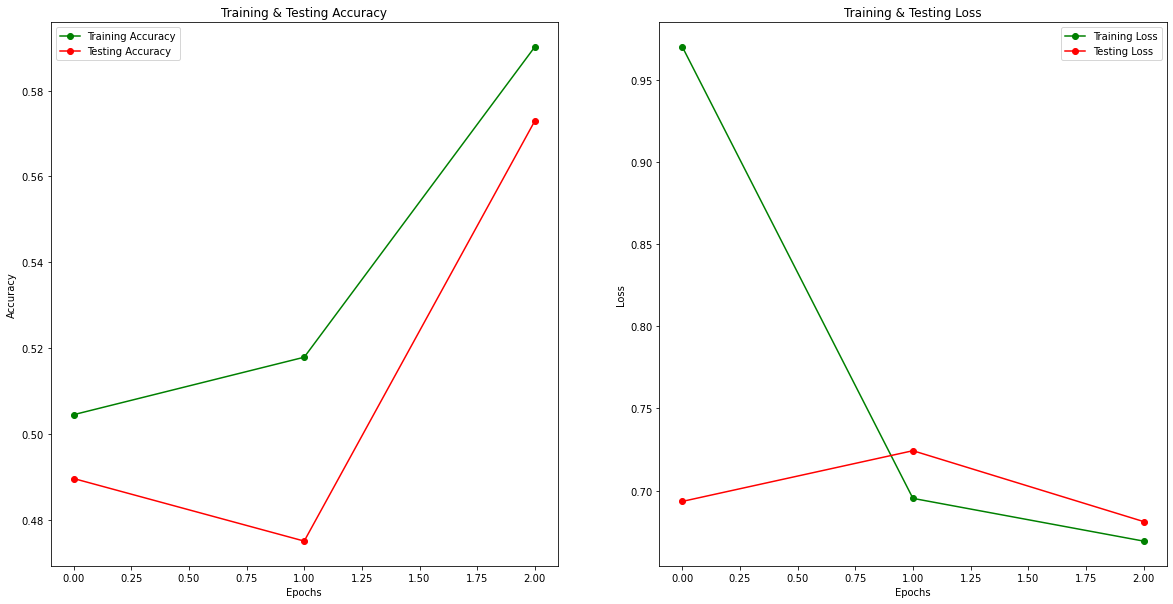

In [111]:
# Plotting for traiing and test accuracy per loop

epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = result1.history['acc']
train_loss = result1.history['loss']
val_acc = result1.history['val_acc']
val_loss = result1.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [112]:
pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

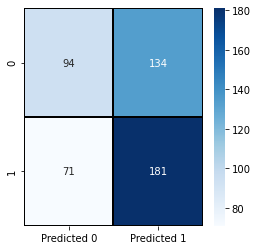

In [113]:
# Pretty CM
cm = confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

### Predicting on Unlabeled Data

#### Setting up train and test for labeled and unlabeled data.

#### Linear Regression

In [114]:
lr=LogisticRegression(max_iter=20000)
lr.fit(x_train_cvec, y_train_cvec)
pred_LR_cv=lr.predict(x_test_cvec)
LogisticsRegression_cv =accuracy_score(y_test_cvec,pred_LR_cv)
print("Accuracy: %.2f%%" % (LogisticsRegression_cv*100.0))

Accuracy: 85.62%


In [115]:

LR_unlabeled_pred = lr.predict(x_test_un)


true_LR = []
fake_LR = []

for i in LR_unlabeled_pred:
    if i== 0: true_LR.append(i)
    else: fake_LR.append(i)

        
print('Counts of predicted truthful reviews:', len(true_LR), ', ',
      'out of 320,', "{:.2f}".format(len(true_LR)/320*100), '% of test data')

print('Counts of predicted fake reviews:', len(fake_LR), ', ', "{:.2f}".format(len(fake_LR)/320*100), '% of test data')

Counts of predicted truthful reviews: 232 ,  out of 320, 72.50 % of test data
Counts of predicted fake reviews: 88 ,  27.50 % of test data


#### Multinomial Naive Bayse

In [116]:
# Training labled data on Mutinomial Naive Bayse Model

nb=MultinomialNB()
nb.fit(x_train_cvec,y_train_cvec)
MNB_pred_CV = nb.predict(x_test_cvec)
MNB_pred_CV_score = accuracy_score(y_test_cvec, MNB_pred_CV)
MNB_pred_CV_score

0.859375

In [117]:
# Predicting unlabled data with trained model with labeled data

MNB_unlabeled_pred = nb.predict(x_test_un)


true_MNB = []
fake_MNB = []

for i in MNB_unlabeled_pred:
    if i== 0: true_MNB.append(i)
    else: fake_MNB.append(i)

        
print('Counts of predicted truthful reviews:', len(true_MNB), ', ',
      'out of 320,', "{:.2f}".format(len(true_MNB)/320*100), '% of test data')

print('Counts of predicted fake reviews:', len(fake_MNB), ', ', "{:.2f}".format(len(fake_MNB)/320*100), '% of test data')

Counts of predicted truthful reviews: 226 ,  out of 320, 70.62 % of test data
Counts of predicted fake reviews: 94 ,  29.38 % of test data


In [118]:
svm=SVC(kernel = 'linear')
svm.fit(x_train_cvec, y_train_cvec)
SCV_pred_CV=svm.predict(x_test_cvec)
SCV_pred_CV_score = accuracy_score(y_test_cvec,SCV_pred_CV)
print("Accuracy: %.2f%%" % (SCV_pred_CV_score*100.0))

Accuracy: 85.94%


#### Support Vector Machine

In [119]:
SCV_unlabeled_pred = svm.predict(x_test_un)

true_SCV = []
fake_SCV = []

for i in SCV_unlabeled_pred:
    if i== 0: true_SCV.append(i)
    else: fake_SCV.append(i)

        
print('Counts of predicted truthful reviews:', len(true_SCV), ', ',
      'out of 320,', "{:.2f}".format(len(true_SCV)/320*100), '% of test data')

print('Counts of predicted fake reviews:', len(fake_SCV), ', ', "{:.2f}".format(len(fake_SCV)/320*100), '% of test data')

Counts of predicted truthful reviews: 221 ,  out of 320, 69.06 % of test data
Counts of predicted fake reviews: 99 ,  30.94 % of test data


In [120]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Truthful", "Fake"]

fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],
                    subplot_titles=['LogisticRegression', 'MultinomialNB', 'Support Vector Machine'])
fig.add_trace(go.Pie(labels=labels, values=[232, 88], scalegroup='one',
                     name='LogisticRegression'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[226,94], scalegroup='one',
                     name='MultinomialNB'), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[221,99], scalegroup='one',
                     name='Support Vector Machine'), 1, 3)

fig.update_layout(title_text='Predicted Numbers of Truthful vs Fake Reviews by Pre-Trained Machine Learning Methods')
fig.show()

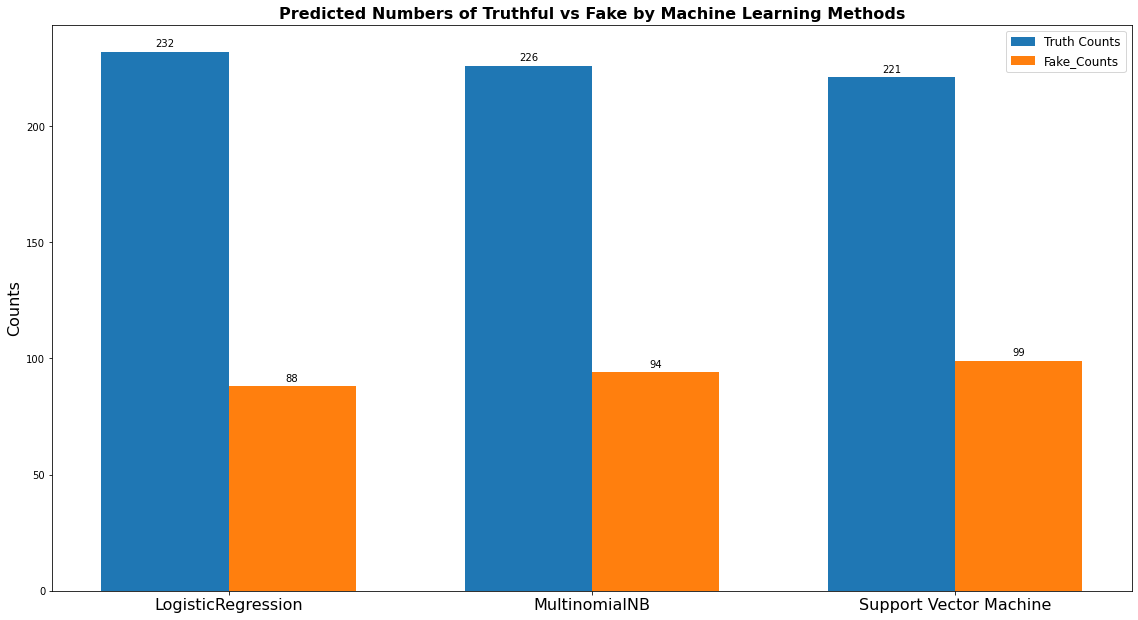

In [121]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['LogisticRegression', 'MultinomialNB', 'Support Vector Machine']


true_counts = [232,  
               226,
               221]

fake_counts = [88,  
               94,
               99]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, true_counts, width, label='Truth Counts')
rects2 = ax.bar(x + width/2, fake_counts, width, label='Fake_Counts')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Predicted Numbers of Truthful vs Fake by Machine Learning Methods', fontsize=16,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(20,10)
plt.show()

### Semi Supervised Model with Label Propagation

In [122]:
# Adding a column to label unlabled with -1 since model recognize -1 as unlabled data
df_unlabel['isFraud'] = -1

In [123]:
# Checking out
df_unlabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1600 non-null   object
 1   isFraud  1600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [124]:
frames1 = [df, df_unlabel]
combined_df = pd.concat(frames1)
combined_df.head(5)

reviews  isFraud  negative
0  completely blow away hotel magnificent get gre...        0       0.0
1  return two night stay affinia chicago visit de...        0       0.0
2  excellent location feel like boutique hotel ri...        0       0.0
3  travel lot business quite frankly expectation ...        0       0.0
4  visit birthday never chicago sure stay found d...        0       0.0

In [125]:
combined_df.reviews

0       completely blow away hotel magnificent get gre...
1       return two night stay affinia chicago visit de...
2       excellent location feel like boutique hotel ri...
3       travel lot business quite frankly expectation ...
4       visit birthday never chicago sure stay found d...
                              ...                        
1595    hotel thrill remodeling room climate control r...
1596    use live chicago love get visit work find grea...
1597    stay day holiday perfect spot center everythin...
1598    talbott hotel place stay visit chicago center ...
1599    partner look forward visit chicago december bo...
Name: reviews, Length: 3200, dtype: object

In [126]:
# 8:2 ratio split for train and test

X= combined_df.reviews
Y= combined_df.isFraud

x= df.reviews
y= df.isFraud


x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=0,test_size=0.2)
x_train_c, x_test_c , y_train_c ,y_test_c =train_test_split(X,Y,random_state=0,test_size=0.2)

In [127]:
# CV transform for each
cv=CountVectorizer(ngram_range=(1,2))

x_train = cv.fit_transform(x_train) 
x_test = cv.transform(x_test) 

x_train_c =cv.transform(x_train_c)
x_test_c = cv.transform(x_test_c)

In [128]:
# Chaning them into dense form because model requires it

x_train_c = x_train_c.toarray()
x_test_c = x_test_c.toarray()

x_train = x_train.toarray()
x_test = x_test.toarray()

In [129]:
# Checking the shape

print(x_train_c.shape)
print(x_test_c.shape)
print(x_train.shape)
print(x_test.shape)

(2560, 66745)
(640, 66745)
(1280, 66745)
(320, 66745)


In [130]:
# Fitting the model

lp_rbf = LabelPropagation(kernel='rbf', gamma=9e-5)
lp_rbf.fit(x_train_c, y_train_c)



LabelPropagation(gamma=9e-05)

In [131]:
pred_c =lp_rbf.predict(x_test)
print("Accuracy: %.2f%%" % (accuracy_score(y_test, pred_c)*100.0))

Accuracy: 50.62%


Accuracy is not significant

In [132]:
print(classification_report(y_test, pred_c))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       162
           1       0.00      0.00      0.00       158

    accuracy                           0.51       320
   macro avg       0.25      0.50      0.34       320
weighted avg       0.26      0.51      0.34       320



In [133]:
print(confusion_matrix(y_test, pred_c))

[[162   0]
 [158   0]]


<AxesSubplot:>

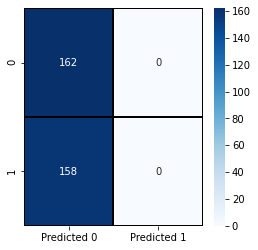

In [134]:
cm = confusion_matrix(y_test, pred_c)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
           linewidth = 1 , 
            annot = True, fmt='' , 
            xticklabels = ['Predicted 0','Predicted 1'] , 
            yticklabels = ['0','1'])

Looking at Confusion matrix, it was not able to predict TruePositives at all.

## Conclusion

- Machine learning model on labeled data was successful with highest 87.7% with supportive vector machine with TF-IDF method.
- Neural network model had accruacy of 51% accuracy.
- Both of semi-supervised model didn't perform well with also 51% accuracy.
